/Users/keyansaguibo/PyCharmMiscProject/.venv/quant_projects/equity_analysis.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)["Close"]
[*********************100%***********************]  3 of 3 completed


Date
2018-01-03    0.006964
2018-01-04    0.005689
2018-01-05    0.012785
2018-01-08    0.000526
2018-01-09   -0.000470
                ...   
2022-12-23    0.005677
2022-12-27   -0.014075
2022-12-28   -0.019219
2022-12-29    0.028251
2022-12-30   -0.001647
Length: 1258, dtype: float64
Ticker          AAPL      GOOG      MSFT
Date                                    
2018-01-03  0.999826  1.016413  1.004654
2018-01-04  1.004470  1.020094  1.013496
2018-01-05  1.015907  1.034958  1.026061
2018-01-08  1.012133  1.039380  1.027109
2018-01-09  1.012017  1.038742  1.026411
...              ...       ...       ...
2022-12-23  3.219987  1.686573  2.949455
2022-12-27  3.175298  1.651268  2.927587
2022-12-28  3.077864  1.623662  2.897565
2022-12-29  3.165043  1.670423  2.977624
2022-12-30  3.172856  1.666291  2.962921

[1258 rows x 3 columns]
Date
2018-01-03    1.006964
2018-01-04    1.012693
2018-01-05    1.025640
2018-01-08    1.026180
2018-01-09    1.025698
                ...   
2022-12-23  

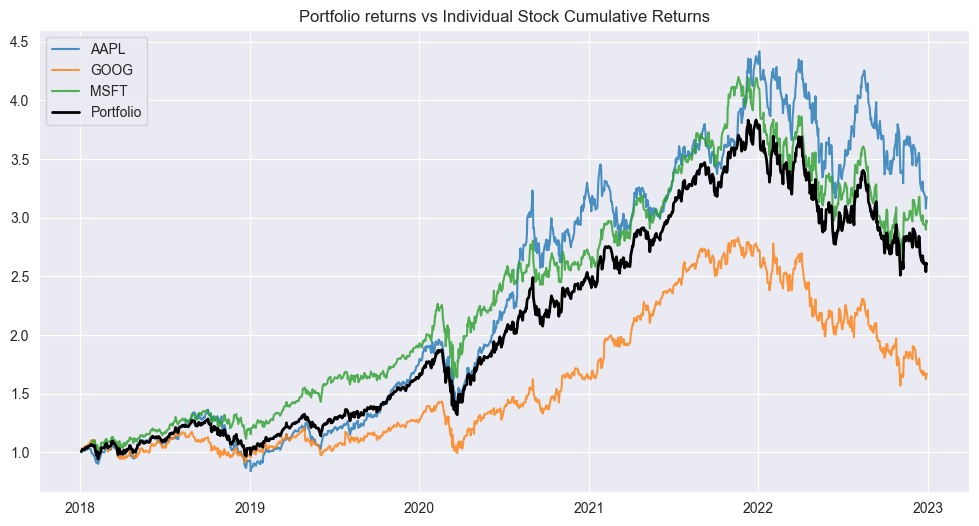

In [1]:
#Portfolio Analytics
import numpy as np
import matplotlib.pyplot as plt
import equity_analysis as ea
import seaborn as sns


data = ea.get_data(["AAPL", "MSFT", "GOOG"], start="2018-01-01", end="2023-01-01")
returns = ea.compute_returns(data)
weight = np.array([1/3,1/3,1/3])
portfolio_returns = returns @ weight
print(portfolio_returns)
cum_returns = ea.compute_cumulative_returns(returns)
print(cum_returns)
cum_portfolio = (1 + portfolio_returns).cumprod()
print(cum_portfolio)

plt.figure(figsize=[12,6])
plt.plot(cum_returns, alpha=0.8)
plt.plot(cum_portfolio, color = 'black', linewidth = 2, label = 'Portfolio')
plt.title('Portfolio returns vs Individual Stock Cumulative Returns')
plt.legend(list(returns.columns) + ['Portfolio'])
plt.show()




<Axes: xlabel='Date'>

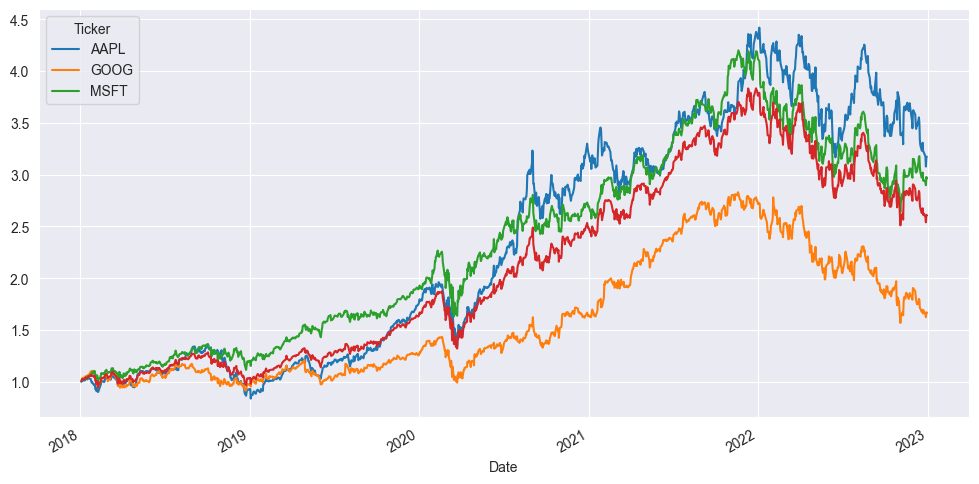

In [2]:
cum_returns.plot(figsize=[12,6])
cum_portfolio.plot(figsize=[12,6])

In [3]:
#volatility portfolio
cov_matrix = returns.cov()
port_variance = weight.T @ cov_matrix @ weight
port_volatility = np.sqrt(port_variance)  # daily std
print("Daily portfolio volatility:", port_volatility)

# Individual stock vols (daily)
individual_vols = returns.std()
print("Daily individual vols:", individual_vols)




Daily portfolio volatility: 0.018436384434439592
Daily individual vols: Ticker
AAPL    0.021094
GOOG    0.019751
MSFT    0.019549
dtype: float64


In [4]:
#Sharpe Ratio
mean_returns = returns.mean()
mean_portfolio = portfolio_returns.mean()
annualized_return = mean_returns * 252
annualized_vol = individual_vols * np.sqrt(252)
annualized_portfolio = mean_portfolio * 252
annualized_portfolio_vol = port_volatility * np.sqrt(252)
sharpe_portfolio = annualized_portfolio / annualized_portfolio_vol
sharpe_individual = annualized_portfolio / annualized_vol
print("Portfolio annual return:", annualized_return)
print("Portfolio annual volatility:", annualized_portfolio_vol)
print("Individual Sharpe:", sharpe_individual)
print("Portfolio Sharpe:", sharpe_portfolio)



Portfolio annual return: Ticker
AAPL    0.287461
GOOG    0.151470
MSFT    0.265836
dtype: float64
Portfolio annual volatility: 0.29266852973225616
Individual Sharpe: Ticker
AAPL    0.701574
GOOG    0.749257
MSFT    0.757001
dtype: float64
Portfolio Sharpe: 0.8026907737708064


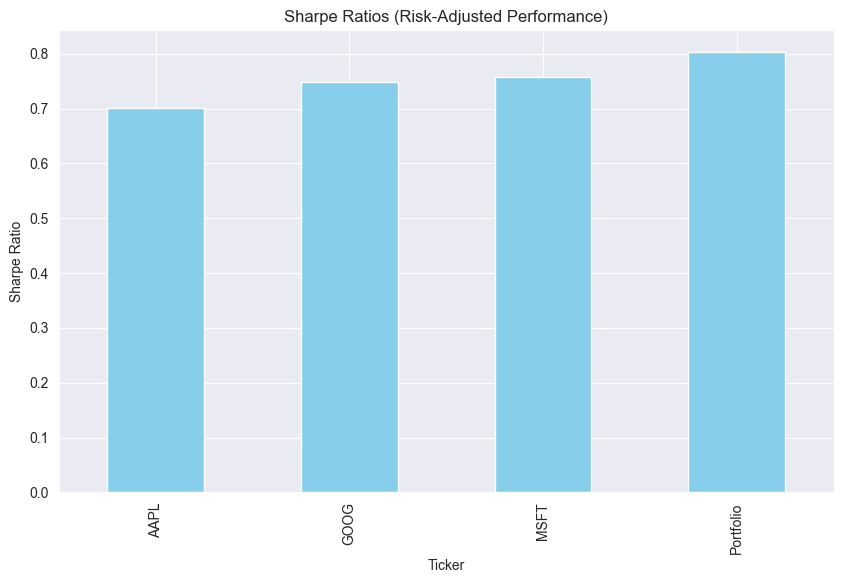

In [5]:
#Visualization

all_sharpes = sharpe_individual.copy()
all_sharpes["Portfolio"] = sharpe_portfolio

all_sharpes.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Sharpe Ratios (Risk-Adjusted Performance)")
plt.ylabel("Sharpe Ratio")
plt.show()

In [6]:
#Correlations Between Assets
corr_matrix = returns.corr()
print(corr_matrix)

Ticker      AAPL      GOOG      MSFT
Ticker                              
AAPL    1.000000  0.700212  0.772959
GOOG    0.700212  1.000000  0.804103
MSFT    0.772959  0.804103  1.000000


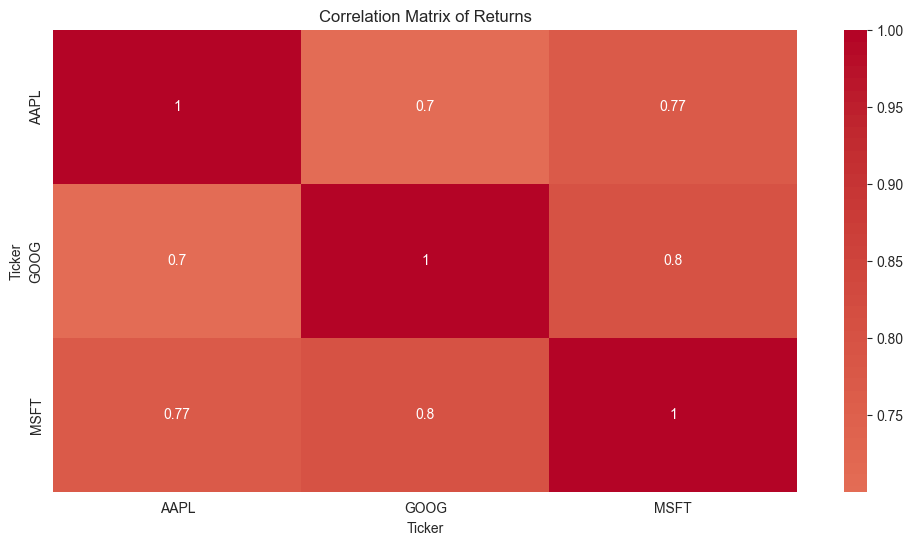

In [7]:
plt.figure(figsize=[12,6])
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0 )
plt.title("Correlation Matrix of Returns")
plt.show()

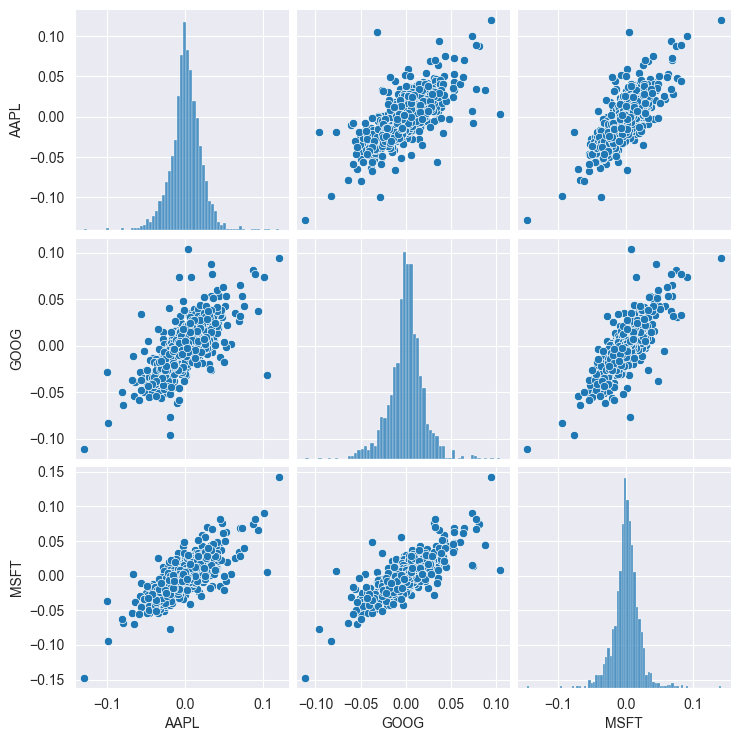

In [8]:
sns.pairplot(returns)
plt.show()

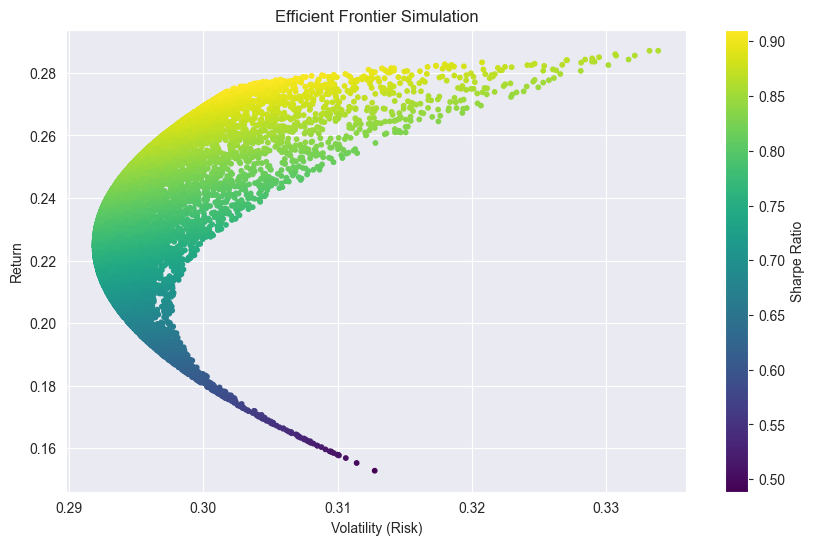

In [10]:
#efficient frontier/monte carlo
cov_matrix_annual = returns.cov() * 252
n_assets = len(mean_returns)
n_portfolios = 10000
results = np.zeros((3,n_portfolios))

for i in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, annualized_return)
    portfolio_volatility = np.sqrt(weights.T @ cov_matrix_annual @ weights)
    sharpe_ratio = portfolio_return / portfolio_volatility

    results[0,i] = portfolio_volatility
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio

plt.figure(figsize=(10,6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap="viridis", s=10)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Return")
plt.title("Efficient Frontier Simulation")
plt.show()


